# Projeto álbum da copa do mundo 2022

![Álbum da copa](https://tm.ibxk.com.br/2022/09/05/05142651246105.jpg?ims=1120x420)

## Contexto
Poucos eventos têm o potencial de mexer com o coração do brasileiro como a copa do mundo. Esta que é a principal competição de futebol do mundo, acontece de 4 em 4 anos, e com ela vem a febre: os álbuns de figurinhas da copa do mundo.

O sucesso é certo e nas bancas de jornais crianças e adultos fazem fila para adquirir o produto. Nas mídias não é raro ver matérias como: "como completar o álbum da copa" ou "quanto custa para completar o álbum da copa".

Neste contexto, até mesmo uma pessoa que não é tão fã do esporte, fica curiosa a respeito desse produto pelo qual tantos são apaixonados.

Esta análise diz respeito ao álbum da Copa do Mundo 2022 da editora Panini, a principal fabricante destes produtos atualmente.

## Informações



*   Total de cromos: 670
*   Preço do envelope com 5 figurinhas: R$ 4,00


*   Preço do álbum de capa dura: R$ 35,00

## Suposições

1.   Todas as figurinhas tem igual probabilidade de serem sorteradas.*
2.   Um pacotinho é comprado por vez até que se complete o álbum.

*O que é verdade com exceção dos [cromos extras](https://www1.folha.uol.com.br/esporte/2022/08/album-da-copa-conheca-mitos-e-verdades-das-figurinhas-vendidas-por-ate-r-9-mil.shtml#:~:text=Para%20o%20%C3%A1lbum,geralmente%20cont%C3%A9m%20cinco.) (raras), que não são levadas em conta nessa análise.





## Algoritmo

1.   Comprar um pacotinho de figurinhas (5 figurinhas cada, que podem ser repetidas);
2.   Colar no álbum e verificar se o álbum está completo;
3.   Caso esteja incompleto, comprar mais um pacotinho, caso contrário, terminar;
4. Simular vários álbuns para obter dados estatísticos.



## Perguntas

1. Qual o valor médio investido para completar o álbum nessas condições?
2. Quantos pacotes são necessários comprar, em média, para completar o álbum?
3. Qual é a distribuição empírica do valor investido para completar o álbum?
4. Qual o valor médio gasto por alguém sortudo (menos cromos repetidos)?
5. Qual o valor médio gasto por alguém azarado (mais cromos repetidos)?
6. Qual as probabilidade de se gastar mais e menos do que a média para completar o álbum?
7. Qual os valores médios gastos caso se esteja completando o álbum com mais pessoas (troca de figurinhas)?

## Simulação

In [89]:
#importação de bibliotecas
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import math as ma

In [94]:
# declaração de variáveis (fixas)
n_album = 670
preco_envelope = 4.00
cromos_por_envelope = 5
preco_album = 35.00
simulacoes = 10000

In [95]:
# representação do álbum (array do tamanho do album com zeros)
album = np.zeros(n_album) 

# representação do envelope de figurinhas (escolha aleatória de 5 figurinhas dentre as 670 possíveis)
envelope = np.random.choice(range(n_album), cromos_por_envelope)

# 'colando' as figurinhas obtidas no álbum (conta as figurinhas que tiramos)
for i in envelope:
    album[i] += 1

In [96]:
# comprando figurinhas até completar o álbum
def SimAlbum():
    album = np.zeros(n_album) 
    envelopes = 0
    while not np.all(album >= 1):
        envelope = np.random.choice(range(n_album), 5)
        envelopes += 1

        for i in envelope:
            album[i] += 1
 
    valor_gasto = preco_album + preco_envelope * envelopes 

    return valor_gasto, envelopes

SimAlbum()

(4347.0, 1078)

In [98]:
# simula completar vários álbuns 
def Simulacao(simulacoes, acabou = False):
    valores = []
    for i in range(simulacoes):
        valores.append(SimAlbum()[0])
        if not acabou:
            if (i+1) % 1000 == 0:
                print('Simulação: ', i+1, '/', simulacoes)                
    return valores

sim = Simulacao(simulacoes)

Simulação:  1000 / 10000
Simulação:  2000 / 10000
Simulação:  3000 / 10000
Simulação:  4000 / 10000
Simulação:  5000 / 10000
Simulação:  6000 / 10000
Simulação:  7000 / 10000
Simulação:  8000 / 10000
Simulação:  9000 / 10000
Simulação:  10000 / 10000


## Análise

### 1. Qual o valor médio investido para completar o álbum nessas condições?

In [99]:
# Qual o valor médio investido para completar o álbum nessas condições?
print('O valor médio gasto foi: R$ ', round(np.mean(sim), 2))

O valor médio gasto foi: R$  3839.96


### 2. Quantos pacotes são necessários comprar, em média, para completar o álbum?

In [100]:
# Quantos enevelopes são necessários comprar, em média, para completar o álbum?
print('O numero de envelopes médio foi:', round((np.mean(sim) - preco_album)/preco_envelope, 2))

O numero de envelopes médio foi: 951.24


### 3. Qual é a distribuição empírica do valor investido para completar o álbum?

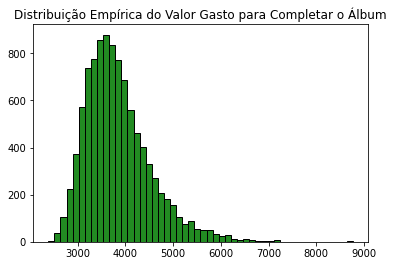

In [101]:
# Qual é a distribuição empírica do valor investido para completar o álbum?
import matplotlib.pyplot as plt
plt.hist(sim, bins = 50, density = False, color = 'forestgreen', edgecolor = 'black')
plt.title('Distribuição Empírica do Valor Gasto para Completar o Álbum')
plt.show()

### 4. Qual o valor médio gasto por alguém sortudo (menos cromos repetidos)?

In [102]:
# Qual o valor médio gasto por alguém sortudo (menos cromos repetidos)?
p10 = []
for valor in sim:
  if valor <= np.quantile(sim, .10):
    p10.append(valor)
md_srt = np.mean(p10)
print(f'O valor médio gasto pelos 10% mais sortudos é: R$ {md_srt:.2f}',)

O valor médio gasto pelos 10% mais sortudos é: R$ 2913.40


### 5. Qual o valor médio gasto por alguém azarado (mais cromos repetidos)?

In [103]:
#Qual o valor gasto por alguém azarado (mais cromos repetidos)?
p90 = []
for valor in sim:
  if valor >= np.quantile(sim, .90):
    p90.append(valor)
md_azr = np.mean(p90)
print(f'O valor médio gasto pelos 10% mais azarados é: R$ {md_azr:.2f}')

O valor médio gasto pelos 10% mais azarados é: R$ 5307.49


###  A seguir duas perguntas que não foram levantadas inicialmente, mas também é interessante saber:

*   Quanto gastou o indivíduo mais sortudo e quantos envelopes ele comprou?
*   Quanto gastou o indivíduo mais azarado e quantos envelopes ele comprou?




In [104]:
# Quanto gastou o indivíduo mais azarado e quantos envelopes ele comprou?
azarado = np.max(sim)
n_env_a = int((azarado - preco_album) / preco_envelope)
print(f'O indivíduo mais azarado gastou R$ {azarado:.2f} e comprou {n_env_a} envelopes.')

O indivíduo mais azarado gastou R$ 8763.00 e comprou 2182 envelopes.


In [105]:
# Quanto gastou o indivíduo mais sortudo e quantos envelopes ele comprou?
sortudo = np.min(sim)
n_env_s = int((sortudo - preco_album) / preco_envelope)
print(f'O indivíduo mais sortudo gastou R$ {sortudo:.2f} e comprou {n_env_s} envelopes.')

O indivíduo mais sortudo gastou R$ 2383.00 e comprou 587 envelopes.


### 6. Qual as probabilidade de se gastar mais e menos do que a média para completar o álbum?

In [106]:
# Qual as probabilidade de se gastar mais e menos do que a média para completar o álbum?
 
prob_menos = sum(np.array(sim) < np.array(sim).mean()) / simulacoes
prob_mais = sum(np.array(sim) > np.array(sim).mean()) / simulacoes
 
print('A probabilidade de se gastar menos do a média é {:.2f}%'.format(prob_menos*100))
print('A probabilidade de se gastar mais do que a média é {:.2f}%'.format(prob_mais*100))

A probabilidade de se gastar menos do a média é 57.15%
A probabilidade de se gastar mais do que a média é 42.85%


###  A seguir mais duas perguntas que não foram levantadas inicialmente, mas também é interessante saber:

*   Qual a probabilidade de se completar um álbum gastando menos de R$ 2.500?

*   Qual a probabilidade de se completar um álbum gastando mais de R$ 5.000?

In [107]:
# Qual a probabilidade de se completar um álbum gastando menos de R$2.500?

prob_2500 = sum(np.array(sim) < 2500) / simulacoes
print('A probabilidade de se gastar menos do que R$2.500 é {:.2f}%'.format(prob_2500*100))

# Qual a probabilidade de se completar um álbum gastando mais de R$5.000?

prob_2500 = sum(np.array(sim) > 4000) / simulacoes
print('A probabilidade de se gastar mais do que R$4.000 é {:.2f}%'.format(prob_2500*100))

A probabilidade de se gastar menos do que R$2.500 é 0.05%
A probabilidade de se gastar mais do que R$4.000 é 33.38%


## Troca de figurinhas

![Álbum da copa](https://alphavilletenisclube.com.br/wp-content/uploads/2022/09/tdf.jpg)

Todo cenário simulado e analisado até agora supoõe um indivíduo que compra envelopes sozinho até completar o álbum, não importando quantos cromos repetidos obtenha no processo. Mas esse não é um cenário muito realista.

Usualmente, os colecionadores separarm os cromos (figurinhas) que têm mais de uma unidade (repetidos) e procuram outros colecionadores que possam trocar, reduzindo os custos com a compra de envelopes adicionais.

Sendo assim, vamos ajustar a função que simula o completamento de um álbum, para funcionar para uma quantidade variável de álbuns, representando assim uma estratégia de completar o álbum em grupo.



### Simulação com troca

In [108]:
print('Selecione a quantidade de amigos para a análise:\n')
slider = widgets.IntSlider(value=20,
                  min=0,
                  max=20)
display(slider)

Selecione a quantidade de amigos para a análise:



IntSlider(value=20, max=20)

In [117]:
amigos = int(slider.value)
qtd_albuns = amigos+1

# comprando figurinhas até completar o álbum
def SimAlbumAmigos(qtd_albuns):
    album = np.zeros(n_album) 
    envelopes = 0
    while not np.all(album >= qtd_albuns):
        envelope = np.random.choice(range(n_album), 5)
        envelopes += 1

        for i in envelope:
            album[i] += 1
 
    valor_gasto = preco_album * qtd_albuns + preco_envelope * envelopes 
    valor_por_album = valor_gasto / qtd_albuns

    return valor_gasto, envelopes, valor_por_album

SimAlbumAmigos(qtd_albuns)

(11130.0, 2730, 1855.0)

In [118]:
def SimulacaoAmigos(qtd_albuns, simulacoes, acabou = False):
    valores = []
    for i in range(simulacoes):
        valores.append(SimAlbumAmigos(qtd_albuns)[2])
        if not acabou:
            if (i+1) % 1000 == 0:
                print('Simulação: ', i+1, '/', simulacoes)
    return valores

sim_amigos = SimulacaoAmigos(qtd_albuns, simulacoes)

Simulação:  1000 / 10000
Simulação:  2000 / 10000
Simulação:  3000 / 10000
Simulação:  4000 / 10000
Simulação:  5000 / 10000
Simulação:  6000 / 10000
Simulação:  7000 / 10000
Simulação:  8000 / 10000
Simulação:  9000 / 10000
Simulação:  10000 / 10000


### 7. Qual os valores médios gastos caso se esteja completando o álbum com mais pessoas (troca de figurinhas)?

In [119]:
# Qual os valores médios gastos caso se esteja completando o álbum com mais pessoas (troca de figurinhas)?

custo_medio_troca = np.array(sim_amigos).mean()
custo_medio_so = round(np.mean(sim), 2)

print(f'O custo médio é de R$ {custo_medio_troca:.2f} por pessoa caso {amigos} amigos troquem figurinhas entre si.\n')
print(f'Trocar figurinhas entre {amigos} amigos é {(1 - custo_medio_troca / custo_medio_so) * 100:.2f}% mais barato do que completar o álbum sem trocar.')

O custo médio é de R$ 1522.68 por pessoa caso 5 amigos troquem figurinhas entre si.

Trocar figurinhas entre 5 amigos é 60.35% mais barato do que completar o álbum sem trocar.
